<a href="https://colab.research.google.com/github/vivekmithlesh/GSOC_MIC_TEST/blob/main/Sentiment_%26_Crisis_Risk_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install vaderSentiment scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [2]:
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
uploaded = files.upload()

Saving task1_cleaned_data.csv to task1_cleaned_data.csv


In [5]:
import pandas as pd

df = pd.read_csv("task1_cleaned_data.csv")
df.head()

,post_id,timestamp,content,cleaned_content,likes,retweets
0,1909293034514063580,2025-04-07 17:11:47+00:00,Portnoy is hopeless. He would rather lose 10 t...,portnoy hopeless would rather lose 10 15 portf...,0,0
1,1909293033876599291,2025-04-07 17:11:46+00:00,It’s hard to care about all this shit cus it’s...,hard care shit cus damn near monthly something...,0,0
2,1909293033004450050,2025-04-07 17:11:46+00:00,Suddenly I’m not depressed anymore https://t.c...,suddenly im depressed anymore,0,0
3,1909293029967478936,2025-04-07 17:11:45+00:00,"According to common sense, the theory goes fro...",according common sense theory goes verificatio...,0,0
4,1909293028759527575,2025-04-07 17:11:45+00:00,RT @Bubblebathgirl: Unhinged leftist protester...,rt bubblebathgirl unhinged leftist protester s...,0,155


In [6]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['cleaned_content'].apply(get_sentiment)
df[['cleaned_content', 'sentiment']].head()

,cleaned_content,sentiment
0,portnoy hopeless would rather lose 10 15 portf...,Negative
1,hard care shit cus damn near monthly something...,Negative
2,suddenly im depressed anymore,Negative
3,according common sense theory goes verificatio...,Negative
4,rt bubblebathgirl unhinged leftist protester s...,Neutral


In [7]:
high_risk_keywords = [
    "kill myself", "end my life", "i want to die", "i don’t want to be here",
    "suicidal", "can’t go on", "die", "give up", "hopeless"
]

moderate_keywords = [
    "i feel lost", "relapse", "anxiety attack", "panic attack",
    "overwhelmed", "mental breakdown", "can’t cope", "depressed"
]

def classify_risk(text):
    text = text.lower()
    if any(word in text for word in high_risk_keywords):
        return 'High-Risk'
    elif any(word in text for word in moderate_keywords):
        return 'Moderate Concern'
    else:
        return 'Low Concern'

df['risk_level'] = df['cleaned_content'].apply(classify_risk)
df[['cleaned_content', 'risk_level']].head()

,cleaned_content,risk_level
0,portnoy hopeless would rather lose 10 15 portf...,High-Risk
1,hard care shit cus damn near monthly something...,Moderate Concern
2,suddenly im depressed anymore,Moderate Concern
3,according common sense theory goes verificatio...,Low Concern
4,rt bubblebathgirl unhinged leftist protester s...,Low Concern


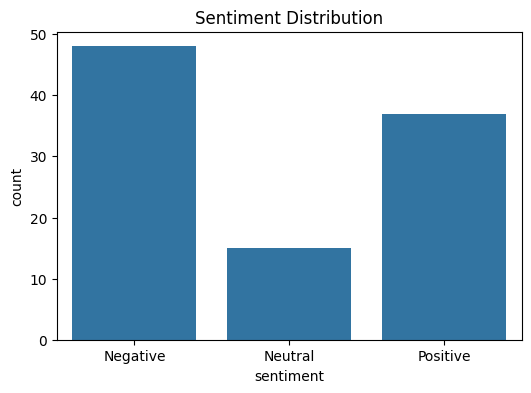

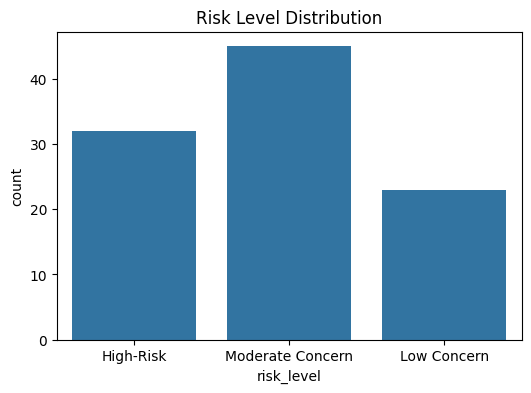

In [8]:
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

# Risk level distribution
plt.figure(figsize=(6,4))
sns.countplot(x='risk_level', data=df)
plt.title("Risk Level Distribution")
plt.show()

In [9]:
df.to_csv("task2_sentiment_risk.csv", index=False)

from google.colab import files
files.download("task2_sentiment_risk.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>